# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
import pickle
import pandas as pd
from sklearn.utils import shuffle
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
%matplotlib inline

E:\Users\TT\Anaconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file='../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
assert(len(X_train) == len(y_train))
assert(len(y_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test =len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

6


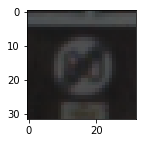

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

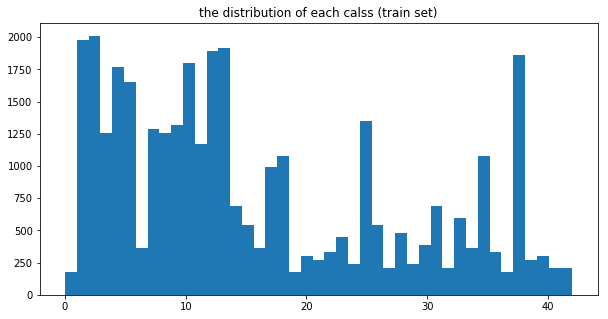

In [6]:
# show the distribution of each class 
plt.figure(figsize=(10, 5))
plt.title('the distribution of each calss (train set)')
plt.hist(y_train,bins=n_classes)
plt.show()

In [7]:
sign_name_df = pd.read_csv('signnames.csv', index_col='ClassId')
sign_name_df.head()
sign_name_df['Occurence'] = [sum(y_train==c) for c in range(n_classes)]
sign_name_df.sort_values('Occurence', ascending=False)

,SignName,Occurence
ClassId,,
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
25,Road work,1350


## agument date

In [8]:
# the code is from https://github.com/naokishibuya/car-traffic-sign-classification/blob/master/Traffic_Sign_Classifier.ipynb
def random_brightness(image, ratio):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    brightness = np.float64(hsv[:, :, 2])
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))
    brightness[brightness>255] = 255
    brightness[brightness<0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def random_rotation(image, angle):
    """
    Randomly rotate the image
    """
    if angle == 0:
        return image
    angle = np.random.uniform(-angle, angle)
    rows, cols = image.shape[:2]
    size = cols, rows
    center = cols/2, rows/2
    scale = 1.0
    rotation = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, rotation, size)

def random_translation(image, translation):
    """
    Randomly move the image
    """
    if translation == 0:
        return 0
    rows, cols = image.shape[:2]
    size = cols, rows
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)
    trans = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(image, trans, size)


def random_shear(image, shear):
    """
    Randomly distort the image
    """
    if shear == 0:
        return image
    rows, cols = image.shape[:2]
    size = cols, rows
    left, right, top, bottom = shear, cols - shear, shear, rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    p1 = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    p2 = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    move = cv2.getAffineTransform(p1,p2)
    return cv2.warpAffine(image, move, size)
    
    
def augment_image(image, brightness, angle, translation, shear):
    image = random_brightness(image, brightness)
    image = random_rotation(image, angle)
    image = random_translation(image, translation)
    image = random_shear(image, shear)
    return image

In [12]:
def find_index():
    list=[]
    for j in range(n_classes):
        n = 0
        for i in (y_train==j):
            n +=1
            if i == True:
                list.append(n-1)
                break
    return list

index = find_index()

n_data_of_classes = np.zeros((n_classes,))
for i in range(n_classes):
        n_data_of_classes[i] = np.sum(y_train==i)

print(n_data_of_classes)

[ 180. 1980. 2010. 1260. 1770. 1650.  360. 1290. 1260. 1320. 1800. 1170.
 1890. 1920.  690.  540.  360.  990. 1080.  180.  300.  270.  330.  450.
  240. 1350.  540.  210.  480.  240.  390.  690.  210.  599.  360. 1080.
  330.  180. 1860.  270.  300.  210.  210.]


In [13]:
# Print iterations progress (http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console)
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bargenerate_distorted_images = False fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    # Print New Line on Complete
    if iteration == total: 
        print()

In [14]:
def cal_total_iteration(threshold): 
    result = 0
    for Class_ID in range(n_classes):
        if n_data_of_classes[Class_ID]<=threshold:
            gap = threshold - n_data_of_classes[Class_ID]
            result += gap
    return result

In [15]:
agument_data_process = False

In [16]:
if agument_data_process == True:
# agument data
    import random

    X_train_agumented = X_train
    y_train_agumented = y_train
    total_iteration = cal_total_iteration(2000)
    timer =0

    for Class_ID in range(n_classes):
    
        if n_data_of_classes[Class_ID]<=2000:
            index_begin = index[Class_ID]
            index_end = index_begin + n_data_of_classes[Class_ID]
            #each_image_adding = np.round(2000/n_data_of_classes[Class_ID])
            #each_image_adding = each_image_adding.astype(int)
            gap = 2000 - n_data_of_classes[Class_ID]
            for k in range(0,gap):
            
                index_random_image = random.randrange(index_begin,index_end)
            
                new_image = augment_image(X_train[index_random_image,:,:,:], brightness=0.7, angle=10, translation=5, shear=2)
                new_image = new_image[np.newaxis,:]
            
                X_train_agumented = np.append(X_train_agumented,new_image,axis=0)
                y_train_agumented = np.append(y_train_agumented,[Class_ID],axis=0)
                
                timer +=1
            
                printProgressBar(timer, total_iteration, prefix = 'Progress:', suffix = 'Complete', length = 50)
        else:
            continue
        
    print("augmented training images are generated.")
    print("%d -> %d" %(X_train.shape[0], X_train_agumented.shape[0]))


In [17]:
if agument_data_process == True:    
    plt.figure(figsize=(10, 5))
    plt.title('the distribution of each calss (train set)')
    plt.hist(y_train_agumented,bins=n_classes)
    plt.show()


In [18]:
#save
if agument_data_process == True:
    train_agumented = {'features': X_train_agumented, 'labels': y_train_agumented}

    # save augmented training dataset
    adata_name = "augment_tran_even.p"
    with open(adata_name, "wb") as f:
        pickle.dump(train_agumented, f)

## work on new data set

In [19]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'augment_tran_even.p'
validation_file='../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

In [20]:
# make sure the length match 
assert(len(X_train) == len(y_train))
assert(len(y_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

In [21]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test =len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 86010
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (86010, 32, 32, 3)
Number of classes = 43


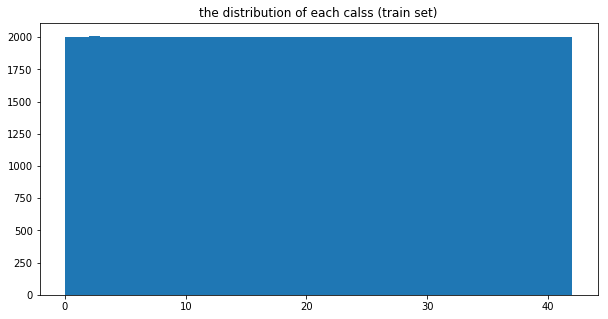

In [22]:
# show the distribution of each class 
plt.figure(figsize=(10, 5))
plt.title('the distribution of each calss (train set)')
plt.hist(y_train,bins=n_classes)
plt.show()

In [23]:
sign_name_df = pd.read_csv('signnames.csv', index_col='ClassId')
sign_name_df.head()
sign_name_df['Occurence'] = [sum(y_train==c) for c in range(n_classes)]
sign_name_df.sort_values('Occurence', ascending=False)

,SignName,Occurence
ClassId,,
2,Speed limit (50km/h),2010
0,Speed limit (20km/h),2000
32,End of all speed and passing limits,2000
24,Road narrows on the right,2000
25,Road work,2000
26,Traffic signals,2000
27,Pedestrians,2000
28,Children crossing,2000
29,Bicycles crossing,2000


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### grayscale

In [24]:
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = gray.reshape((32,32,1))
    
    return gray

graysacale image data shape = (86010, 32, 32, 1)
20


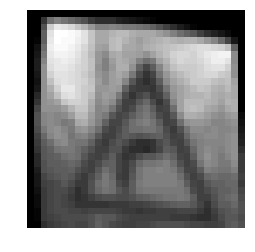

In [25]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#X_train_gray = np.zeros((len(X_train_augmented), 32, 32, 1), dtype=np.float32)
X_train_gray = np.zeros((n_train, 32, 32, 1), dtype=np.float32)
X_validation_gray = np.zeros((n_validation, 32, 32, 1), dtype=np.float32)
X_test_gray = np.zeros((n_test, 32, 32, 1), dtype=np.float32)

for i in range(0,n_train):
    X_train_gray[i] = grayscale(X_train[i])
    #X_train_gray[i] = grayscale(X_train_augmented[i])
    
for i in range(0,n_validation):
    X_validation_gray[i] = grayscale(X_validation[i])
    
for i in range(0,n_test):
    X_test_gray[i] = grayscale(X_test[i])

#X_train_N = normalization(X_train)
#X_validation_N = normalization(X_validation)
#X_test_N = normalization(X_test)

print("graysacale image data shape =", X_train_gray.shape)

index=np.random.randint(n_train)
plt.imshow(X_train_gray[index].squeeze(),cmap='gray')
plt.axis('off')
print(y_train[index])

### normalization

In [26]:
#X_train_normalization = (X_train_gray - 127.5)/255 
#X_valid_normalization = (X_validation_gray - 127.5)/255 
#X_test_normalization = (X_test_gray - 127.5)/255

X_train_normalization = (X_train_gray - X_train_gray.mean())/X_train_gray.std() 
X_valid_normalization = (X_validation_gray - X_validation_gray.mean())/X_validation_gray.std() 
X_test_normalization = (X_test_gray - X_test_gray.mean())/X_test_gray.std()

print("normalization image data shape =", X_train_normalization.shape)

normalization image data shape = (86010, 32, 32, 1)


### Model Architecture

In [27]:
#parameter
EPOCHS = 20
BATCH_SIZE = 128

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## modified LeNet

In [29]:

def modified_LeNet_1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

   
    # SOLUTION: Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
     # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 36), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(36))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    # SOLUTION: Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)


    # SOLUTION: Flatten. Input = 5x5x16. Output = 900.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 900. Output = 1024.
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(900, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout(fc1,keep_prob)# droup
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.dropout(fc2,keep_prob)# droup
    
      # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    
    

    # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    fc3 = tf.nn.dropout(fc3,keep_prob)# droup
    
      # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 128. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    
    return logits

In [30]:
def modified_LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(48))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

   
    # SOLUTION: Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
     # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)


    # SOLUTION: Flatten. Input = 5x5x128. Output = 3200.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 3200. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout(fc1,keep_prob)# droup
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.dropout(fc2,keep_prob)# droup
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)    
    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [53]:
def modified_LeNet_3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x64.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

   
    # SOLUTION: Pooling. Input = 28x28x64. Output = 14x14x64.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
     # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)


    # SOLUTION: Flatten. Input = 5x5x128. Output = 3200.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 3200. Output = 1024.
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.dropout(fc1,keep_prob)# droup
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.dropout(fc2,keep_prob)# droup
    
      # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    
    

    # SOLUTION: Layer 5: Fully Connected. Input = 512. Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    fc3 = tf.nn.dropout(fc3,keep_prob)# droup
    
      # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 128. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

rate = 0.0002
logits = modified_LeNet_3(x)
#logits = modified_LeNet_1(x) # different model
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [34]:
accuracy_hist =[[],[]]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalization)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_data, y_train_data = shuffle(X_train_normalization, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.50})
            
        validation_accuracy = evaluate(X_valid_normalization, y_validation)
        train_accuracy = evaluate(X_train_normalization, y_train)
        accuracy_hist[0].append(validation_accuracy)
        accuracy_hist[1].append(train_accuracy) 
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, Training Accuracy = {:.3f}".format(validation_accuracy,train_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.709, Training Accuracy = 0.570

EPOCH 2 ...
Validation Accuracy = 0.880, Training Accuracy = 0.796

EPOCH 3 ...
Validation Accuracy = 0.929, Training Accuracy = 0.895

EPOCH 4 ...
Validation Accuracy = 0.941, Training Accuracy = 0.936

EPOCH 5 ...
Validation Accuracy = 0.945, Training Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.957, Training Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.964, Training Accuracy = 0.982

EPOCH 8 ...
Validation Accuracy = 0.962, Training Accuracy = 0.984

EPOCH 9 ...
Validation Accuracy = 0.960, Training Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.964, Training Accuracy = 0.992

EPOCH 11 ...
Validation Accuracy = 0.968, Training Accuracy = 0.994

EPOCH 12 ...
Validation Accuracy = 0.971, Training Accuracy = 0.996

EPOCH 13 ...
Validation Accuracy = 0.969, Training Accuracy = 0.996

EPOCH 14 ...
Validation Accuracy = 0.968, Training Accuracy = 0.997

EPOCH 15 ...
Validation Accura

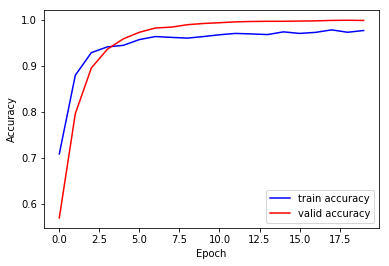

In [36]:

accuracy_hist=np.transpose(np.array(accuracy_hist))
plt.plot(accuracy_hist[0],'b',label='train accuracy')
plt.plot(accuracy_hist[1],'r',label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)


In [37]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalization, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.965


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Five pictures of German traffic signs from the web:


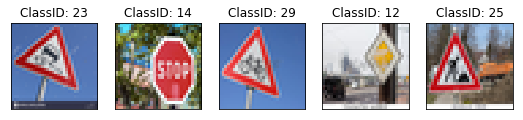

img_set size: (5, 32, 32, 3)


In [38]:
from PIL import Image
import os
img_set = np.zeros(shape=(5,32,32,3))
n_test_img = 0
target_img_file_names = []
y_real_image = np.array([23,14,29,12,25])

print('Five pictures of German traffic signs from the web:')

fig = plt.figure(figsize=(9,3))

for img_file in os.listdir("real_image"): 
    if img_file.endswith(".jpg"):
        # save file name
        target_img_file_names.append(img_file)
        
        # load images and resize it to (32,32,3)
        img = Image.open('real_image/' + img_file).convert('RGB') # load image into RGB
        img = img.resize((32,32), Image.ANTIALIAS) # resizes image in-place
        
        # append image as (N, 32, 32, 3) 
        img_set[n_test_img,:,:,:] = np.array(img, dtype=np.float32)
        n_test_img += 1
        
        # Print the names and pictures of the target images
        ax_ = fig.add_subplot(1, 5, n_test_img)
        ax_.imshow(img, cmap="gray")
        ax_.set_xticks([])
        ax_.set_yticks([])
        ax_.set_title(str("ClassID")+ ": " + str(y_real_image[n_test_img-1]))
# plt.savefig('five_test_images.png')
plt.show()
        
# print appended image shape
print('img_set size: ' + str(img_set.shape))


### Predict the Sign Type for Each Image

In [46]:
X_real_gray = np.zeros((len(img_set), 32, 32, 1), dtype=np.float32)

for i in range(0,len(img_set)):
    X_real_gray[i] = grayscale(img_set[i].astype(np.float32))

25


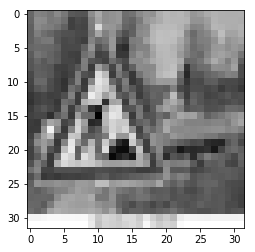

In [47]:
plt.imshow(X_real_gray[4].squeeze(),cmap='gray')
print(y_real_image[4])

In [48]:
X_real_image = (X_real_gray - X_real_gray.mean())/X_real_gray.std() 
y_real_image = np.array([23,14,29,12,25])

### Analyze Performance

In [49]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_real_image, y_real_image)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [50]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#show results 
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    out_pro = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=6),feed_dict = {x: X_real_image, keep_prob: 1.0})
    
    print(out_pro)

INFO:tensorflow:Restoring parameters from .\lenet
TopKV2(values=array([[9.9881810e-01, 1.1819121e-03, 1.1398550e-08, 3.6615289e-10,
        1.1228987e-11, 2.5793634e-14],
       [7.1364081e-01, 2.6399499e-01, 2.2340667e-02, 1.3284568e-05,
        5.4721190e-06, 3.1527900e-06],
       [8.6842203e-01, 6.5046057e-02, 6.1799698e-02, 4.4875951e-03,
        1.8765946e-04, 5.4362288e-05],
       [5.0918049e-01, 4.8375002e-01, 3.2034996e-03, 2.7623728e-03,
        4.8862817e-04, 4.0684390e-04],
       [1.0000000e+00, 7.0281030e-15, 4.2285481e-18, 1.1352965e-19,
        3.1008048e-20, 2.5162390e-27]], dtype=float32), indices=array([[23, 19,  9, 31, 29, 20],
       [14, 40, 12,  0, 38,  4],
       [29, 31, 23, 25, 20, 22],
       [12, 13, 25,  2, 38,  1],
       [25, 20, 18, 38, 22, 30]]))


In [51]:
import pandas as pd
ID = pd.read_csv("signnames.csv")
print(ID.head())
print(ID.loc[3]['SignName'])

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)
Speed limit (60km/h)


[[9.9881810e-01 1.1819121e-03 1.1398550e-08 3.6615289e-10 1.1228987e-11
  2.5793634e-14]
 [7.1364081e-01 2.6399499e-01 2.2340667e-02 1.3284568e-05 5.4721190e-06
  3.1527900e-06]
 [8.6842203e-01 6.5046057e-02 6.1799698e-02 4.4875951e-03 1.8765946e-04
  5.4362288e-05]
 [5.0918049e-01 4.8375002e-01 3.2034996e-03 2.7623728e-03 4.8862817e-04
  4.0684390e-04]
 [1.0000000e+00 7.0281030e-15 4.2285481e-18 1.1352965e-19 3.1008048e-20
  2.5162390e-27]]


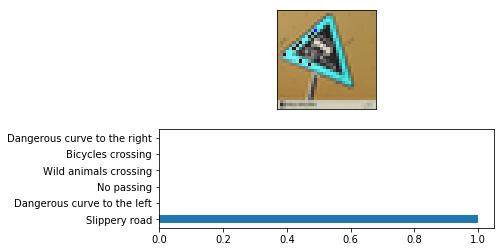

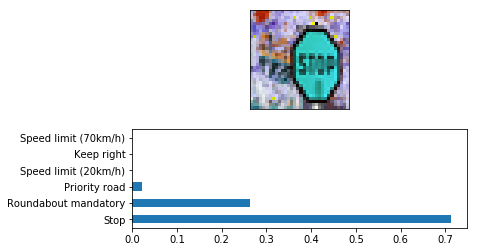

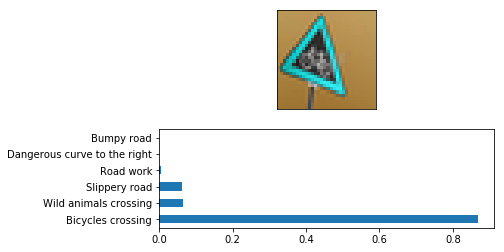

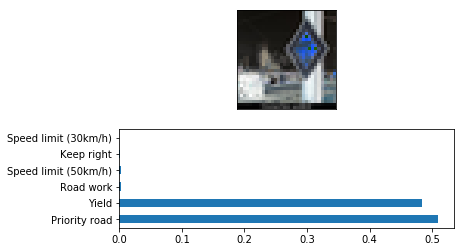

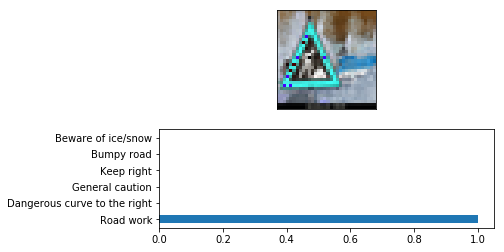

In [52]:
index = np.arange(6)
proba, prediction = out_pro
print(proba)

for n in range(5):
    plt.subplot(2,1,1)
    plt.imshow(img_set[n])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    
    plt.subplot(2,1,2)
    plt.barh(index, proba[n], height=0.5, align='center')
    #plt.yticks(np.array([]))
    plt.yticks(index,[ID.loc[prediction[n][j]]['SignName'] for j in index] )
    plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")